In [117]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 【問題1】乱数の作成
平均が(-3, 0)、共分散行列が以下で表される2次元正規分布による乱数を500個作成してください。

\begin{bmatrix}
1.0 & 0.8 \\ 0.8 & 1.0
\end{bmatrix}

多次元の正規分布による乱数は<span style="color : red;"> np.random.multivariate_normal() </span> を使うことで作成できます。


作成したndarrayのshapeは(500, 2)になります。


《シード値について》


実行ごとに値が変わらないように、<span style="color : red;"> np.random.seed() </span>により乱数のシード値を固定しておきましょう。

今回シード値は0を使うことにします。

```.python
np.random.seed(0)
```

In [118]:
np.random.seed(0)             #Seed値を固定
mu_1 = (-3, 0)                  # 平均 
cov_1 = [[1.0, 0.8],[0.8, 1.0]] # 共分散
size_1 = 500                    #乱数の数

dummy_data_1 = np.random.multivariate_normal(mu_1, cov_1, size_1) 

## 【問題2】散布図による可視化
問題1で作成したデータ点を散布図により可視化してください。

散布図はmatplotlibのplt.scatter()を使うことで描けます。

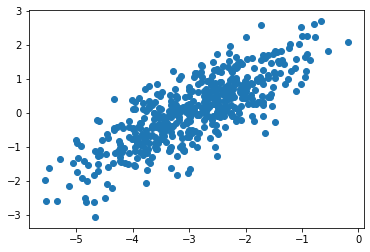

In [119]:
plt.scatter(dummy_data_1[:, 0], dummy_data_1[:, 1])
plt.show()

## 【問題3】ヒストグラムによる可視化
問題1で作成したデータをヒストグラムにより可視化してください。

ヒストグラムは<span style="color: red;"> plt.hist() </span> を使うことで描けます。

各次元ごとに作成し、2つのヒストグラムとしてください。

それぞれのヒストグラムの横軸の範囲はplt.xlim()を用いて揃えるようにしてください。

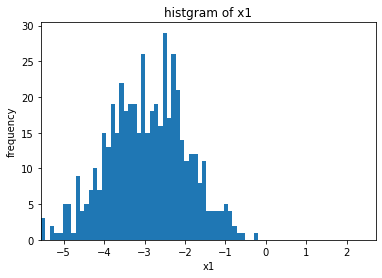

In [120]:
# 縮尺を合わせるためにデータの最小値と最大値を取得
x_min = np.min(dummy_data_1)
x_max = np.max(dummy_data_1)

X1 = dummy_data_1[:, 0]
plt.hist(X1, bins=50)
plt.title("histgram of x1")
plt.xlabel("x1")
plt.ylabel("frequency")
plt.xlim(x_min, x_max)
plt.show()

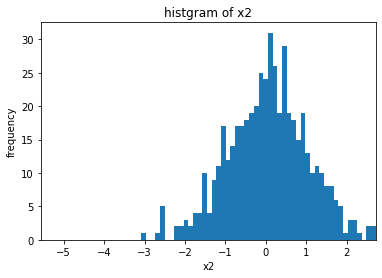

In [121]:
X2 = dummy_data_1[:, 1]
plt.hist(X2, bins=50)
plt.title("histgram of x2")
plt.xlabel("x2")
plt.ylabel("frequency")
plt.xlim(x_min, x_max)
plt.show()

## 【問題4】データの追加
新たに平均が(0, -3)、共分散行列が以下で表される2次元正規分布による乱数を500個作成してください。

\begin{bmatrix}
1.0 && 0.8 \\ 0.8 && 1.0
\end{bmatrix}

そして、問題1、4それぞれのデータをひとつの散布図として可視化してください。

凡例として問題1のものは0、問題2のものは1を表示してください。

In [122]:
mu_2  = (0, -3)
cov_2 = [[1.0, 0.8], [0.8, 1.0]]
size_2 = 500

dummy_data_2 = np.random.multivariate_normal(mu_2, cov_2, size_2)

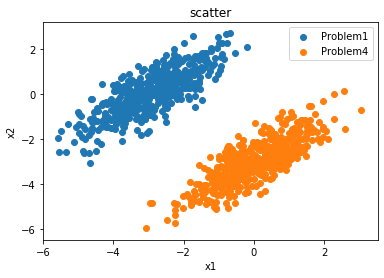

In [123]:
plt.scatter(dummy_data_1[:, 0], dummy_data_1[:, 1], label="Problem1")     #問題１の散布図
plt.scatter(dummy_data_2[:, 0], dummy_data_2[:, 1], label="Problem4") #問題４の散布図

plt.title("scatter")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

## 【問題5】データの結合
データはまとめておいた方が後々扱いやすいです。

問題1、4で作成したndarrayを 結合 し、(1000, 2)のndarrayとしてください。

結合はnp.concatenate()やnp.vstack()を使うことで行えます。

In [124]:
dummy_data_all = np.concatenate((dummy_data_1, dummy_data_2), axis=0)
dummy_data_all.shape

(1000, 2)

## 【問題6】ラベル付け
ひとまとめになった1000個のデータそれぞれに対して、問題1、4どちらで作成したものなのかを示す ラベル 付けを行ってください。

問題1のものには0、問題4のものには1を対応させます。

0と1を含むラベルの列を新たに追加し、(1000, 3)のndarrayを作成してください。

機械学習に使用するデータセットはこのような形になっていることが多いです。

In [125]:
y_0, y_1 = np.zeros((500, 1)), np.ones((500, 1))
y =  np.concatenate((y_0, y_1))

dummy_data_all = np.concatenate((dummy_data_all, y), axis=1)
dummy_data_all.shape

(1000, 3)

## 以下は確認

In [134]:
import pandas as pd
df = pd.DataFrame(dummy_data_all)

df1 = df[df[2] == 0]
df2 = df[df[2] == 1]

In [139]:
df1.describe()

,0,1,2
count,500.000000,500.000000,500.0
mean,-2.930036,0.054059,0.0
std,0.974049,0.980331,0.0
min,-5.559520,-3.079085,0.0
25%,-3.609230,-0.586702,0.0
50%,-2.915323,0.106897,0.0
75%,-2.251109,0.698228,0.0
max,-0.184833,2.714447,0.0


In [140]:
df2.describe()

,0,1,2
count,500.000000,500.000000,500.0
mean,-0.022458,-3.019080,1.0
std,0.967715,0.978687,0.0
min,-3.068176,-5.948326,1.0
25%,-0.681964,-3.687929,1.0
50%,-0.071598,-3.013576,1.0
75%,0.634146,-2.376688,1.0
max,3.034216,0.119516,1.0
